Inpendent Variables:
    GDP per capita
    Human Development Index (HDI)
    Total Population
    Transparency Index

Dependent Variables:
    Total Cases per million
    Total Deaths per million
    
Other Data Columns:
    ISO Code
    Continent
    Location
    Date

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr
import gmaps
import requests
import gmaps.datasets
import ipywidgets as widgets
import seaborn as sns; sns.set(style='white')
import gmaps.geojson_geometries

In [26]:
from configMarc import g_key
gmaps.configure(api_key=g_key)

In [27]:
# Study data files
owidCovidData = "Resources/owid-covid-data-20210430.csv"
transparencyData = "Resources/Transparency Index.csv"
RegionData = "Resources/EuropeRegions.csv"

CovidData = pd.read_csv(owidCovidData)
Transparency = pd.read_csv(transparencyData)
Regions = pd.read_csv(RegionData)

In [71]:
# eliminate extra columns
CovidClean = CovidData.copy()
CovidClean.drop(['new_cases', 'new_cases_smoothed', 'new_deaths', 'new_deaths_smoothed', 'new_cases_per_million', 
                 'new_cases_smoothed_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 
                 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 
                 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 
                 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 
                 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 
                 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million', 'stringency_index',
                 'median_age', 'aged_65_older', 'aged_70_older', 'extreme_poverty', 'cardiovasc_death_rate',
                 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy',
                 'people_fully_vaccinated_per_hundred'], axis = 1, inplace = True)

# limit to max date
CovidEuro = CovidClean[CovidClean['continent'].isin(['Europe'])]
CovidEuro = CovidEuro[CovidEuro['date'].isin(['2021-04-30'])]

# rename "Location" to "Country"
CovidEuro.rename(columns={"location":"Country"}, inplace=True)

# rename everything else for ease
CovidEuro.rename(columns={'total_cases_per_million': "Cases/M", 'total_deaths_per_million': "Deaths/M", "total_cases":"Cases", "total_deaths": "Deaths", "population": "Population", 
                           "population_density": "Density","gdp_per_capita": "GDP", "human_development_index": "HDI"}, inplace=True)

# merge with Transparency (inner join)
CovidEuro = pd.merge(CovidEuro, Transparency, on=["Country"], how="inner")
CovidEuro.drop(['Rank'], axis = 1, inplace = True)

# merge with regions
CovidEuro = pd.merge(CovidEuro, Regions, on = ["Country"], how = "inner")
CovidEuro.drop(['Notes'], axis = 1, inplace = True)



# # drop lines with null values
CovidEuro.dropna(how = "any", inplace = True)


CovidEuro
CovidEuro.to_csv("Resources/CovidWorkingDataEuro.csv", index = False)


In [72]:
CovidEuro

,iso_code,continent,Country,date,Cases,Deaths,Cases/M,Deaths/M,Population,Density,GDP,HDI,Score,Region
0,ALB,Europe,Albania,2021-04-30,131085.0,2394.0,45550.420,831.885,2877800.0,104.871,11803.431,0.795,36.0,Eastern Europe
1,AUT,Europe,Austria,2021-04-30,618870.0,10205.0,68714.470,1133.083,9006400.0,106.749,45436.686,0.922,76.0,Western Europe
2,BLR,Europe,Belarus,2021-04-30,358738.0,2542.0,37964.421,269.014,9449321.0,46.858,17167.967,0.823,47.0,Eastern Europe
3,BEL,Europe,Belgium,2021-04-30,990229.0,24230.0,85441.053,2090.665,11589616.0,375.564,42658.576,0.931,76.0,Western Europe
4,BIH,Europe,Bosnia and Herzegovina,2021-04-30,198461.0,8551.0,60491.372,2606.365,3280815.0,68.496,11713.895,0.780,35.0,Eastern Europe
5,BGR,Europe,Bulgaria,2021-04-30,404380.0,16399.0,58197.194,2360.096,6948445.0,65.180,18563.307,0.816,44.0,Eastern Europe
6,HRV,Europe,Croatia,2021-04-30,332183.0,7081.0,80916.276,1724.857,4105268.0,73.726,22669.797,0.851,47.0,Eastern Europe
7,CYP,Europe,Cyprus,2021-04-30,65233.0,308.0,74475.482,351.639,875899.0,127.657,32415.132,0.887,57.0,Southern Europe
8,CZE,Europe,Czechia,2021-04-30,1630758.0,29267.0,152279.460,2732.940,10708982.0,137.176,32605.906,0.900,54.0,Eastern Europe
9,DNK,Europe,Denmark,2021-04-30,251249.0,2484.0,43377.105,428.852,5792203.0,136.520,46682.515,0.940,88.0,Northern Europe


In [30]:
# # Pair Plots as of 4/30/2021

# # Use Seaborn to create a PairGrid
# def corrfunc(x, y, ax=None, **kws):
#     """Plot the correlation coefficient in the top left hand corner of a plot."""
#     r, _ = pearsonr(x, y)
#     ax = ax or plt.gca()
#     ax.annotate(f'coor = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

# g = sns.pairplot(CovidEuro, corner=True)  # Set corner=True to plot only the lower triangle:
# g.map_lower(corrfunc)
# # plt.show()

In [76]:
EuroSummary = CovidEuro.groupby(['Region']).agg({"Cases": ["sum"],"Deaths": ["sum"], "Population": ["sum"], "Score": ["mean"]}, )
EuroSummary["Cases/m"] = round(EuroSummary["Cases"] / (EuroSummary["Population"] / 1000000),2).astype(float)
EuroSummary["Deaths/m"] = round(EuroSummary["Deaths"] / (EuroSummary["Population"] / 1000000),2).astype(float)
EuroSummary["Fatality Rate (%)"] = round(EuroSummary["Deaths"] / (EuroSummary["Cases"])*100,2).astype(float)
EuroSummary

,Cases,Deaths,Population,Score,Cases/m,Deaths/m,Fatality Rate (%)
,sum,sum,sum,mean,,,
Region,,,,,,,
Eastern Europe,16857684.0,385271.0,320807095.0,46.150000,52547.73,1200.94,2.29
Northern Europe,1431103.0,18231.0,27194683.0,83.400000,52624.37,670.39,1.27
Southern Europe,8823781.0,227099.0,129153812.0,56.000000,68319.94,1758.36,2.57
Western Europe,17623567.0,383711.0,271766915.0,77.444444,64848.10,1411.91,2.18


In [66]:
Eastern = CovidEuro[CovidEuro['Region'].isin(['Eastern Europe'])]
Northern = CovidEuro[CovidEuro['Region'].isin(['Northern Europe'])]
Southern = CovidEuro[CovidEuro['Region'].isin(['Southern Europe'])]
Western = CovidEuro[CovidEuro['Region'].isin(['Western Europe'])]

The Pearson correlation between GDP per capita and cases per million is 0.01
The r-squared is: 0.0


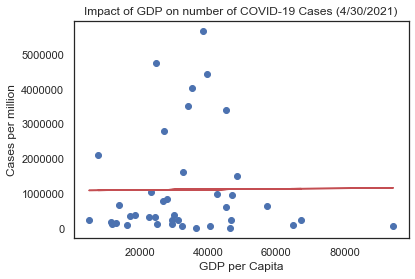

In [91]:
# Calculate the correlation value because why not
correlation = st.pearsonr(CovidEuro["GDP"],CovidEuro["Cases"])
print(f"The Pearson correlation between GDP per capita and cases per million is {round(correlation[0],2)}")


# Plot
x_values = CovidEuro["GDP"]
y_values = CovidEuro["Cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('GDP per Capita')
plt.ylabel("Cases per million")
plt.title ("Impact of GDP on number of COVID-19 Cases (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(0,2),fontsize=10,color="red")

# Print
plt.savefig("Output/ScatterEuroGDPvsCases.png")

#Display
plt.show()

The Pearson correlation between HDI and cases per million is 0.11
The r-squared is: 0.01


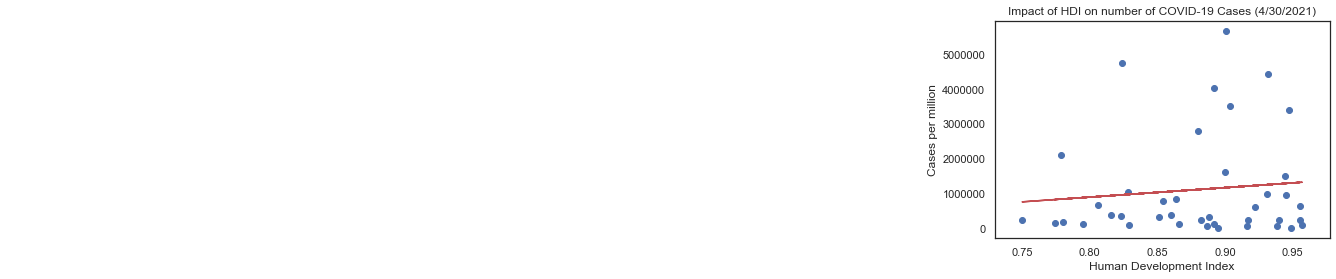

In [92]:
# Calculate the correlation value because why not
correlation = st.pearsonr(CovidEuro["HDI"],CovidEuro["Cases"])
print(f"The Pearson correlation between HDI and cases per million is {round(correlation[0],2)}")


# Plot
x_values = CovidEuro["HDI"]
y_values = CovidEuro["Cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('Human Development Index')
plt.ylabel("Cases per million")
plt.title ("Impact of HDI on number of COVID-19 Cases (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(0,2),fontsize=10,color="red")

# Print
plt.savefig("Output/ScatterEuroHDIvsCases.png")

#Display
plt.show()

The Pearson correlation between corruption perception and cases per million is 0.01
The r-squared is: 0.0


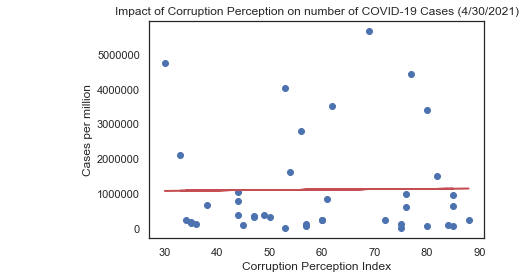

In [93]:
# Calculate the correlation value because why not
correlation = st.pearsonr(CovidEuro["Score"],CovidEuro["Cases"])
print(f"The Pearson correlation between corruption perception and cases per million is {round(correlation[0],2)}")


# Plot
x_values = CovidEuro["Score"]
y_values = CovidEuro["Cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('Corruption Perception Index')
plt.ylabel("Cases per million")
plt.title ("Impact of Corruption Perception on number of COVID-19 Cases (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(0,2),fontsize=10,color="red")

# Print
plt.savefig("Output/ScatterEuroScoreVsCases.png")

#Display
plt.show()

The Pearson correlation between GDP per capita and deaths per million is -0.01
The r-squared is: 0.0


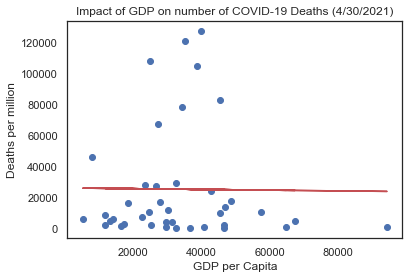

In [94]:
# Calculate the correlation value because why not
correlation = st.pearsonr(CovidEuro["GDP"],CovidEuro["Deaths"])
print(f"The Pearson correlation between GDP per capita and deaths per million is {round(correlation[0],2)}")


# Plot
x_values = CovidEuro["GDP"]
y_values = CovidEuro["Deaths"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('GDP per Capita')
plt.ylabel("Deaths per million")
plt.title ("Impact of GDP on number of COVID-19 Deaths (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(0,2),fontsize=10,color="red")

# Print
plt.savefig("Output/ScatterEuroGDPvsDeaths.png")

#Display
plt.show()

The Pearson correlation between HDI and cases per million is 0.08
The r-squared is: 0.94


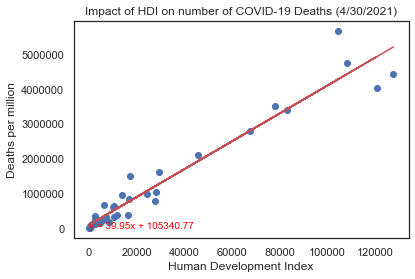

In [95]:
# Calculate the correlation value because why not
correlation = st.pearsonr(CovidEuro["HDI"],CovidEuro["Deaths"])
print(f"The Pearson correlation between HDI and cases per million is {round(correlation[0],2)}")


# Plot
x_values = CovidEuro["Deaths"]
y_values = CovidEuro["Cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('Human Development Index')
plt.ylabel("Deaths per million")
plt.title ("Impact of HDI on number of COVID-19 Deaths (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(0,2),fontsize=10,color="red")

# Print
plt.savefig("Output/ScatterEuroHDIvsDeaths.png")

#Display
plt.show()

The Pearson correlation between corruption perception and deaths per million is -0.02
The r-squared is: 0.0


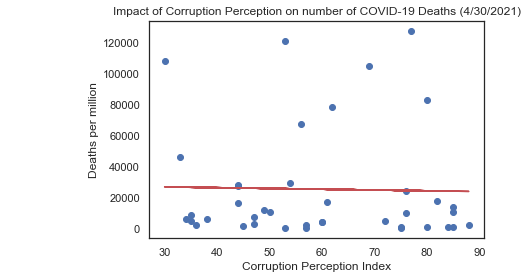

In [96]:
# Calculate the correlation value because why not
correlation = st.pearsonr(CovidEuro["Score"],CovidEuro["Deaths"])
print(f"The Pearson correlation between corruption perception and deaths per million is {round(correlation[0],2)}")


# Plot
x_values = CovidEuro["Score"]
y_values = CovidEuro["Deaths"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('Corruption Perception Index')
plt.ylabel("Deaths per million")
plt.title ("Impact of Corruption Perception on number of COVID-19 Deaths (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(0,2),fontsize=10,color="red")

# Print
plt.savefig("Output/ScatterEuroScoreVsCases.png")

#Display
plt.show()

Text(0.5, 1.0, 'Cases per Million grouped by Europen Region')

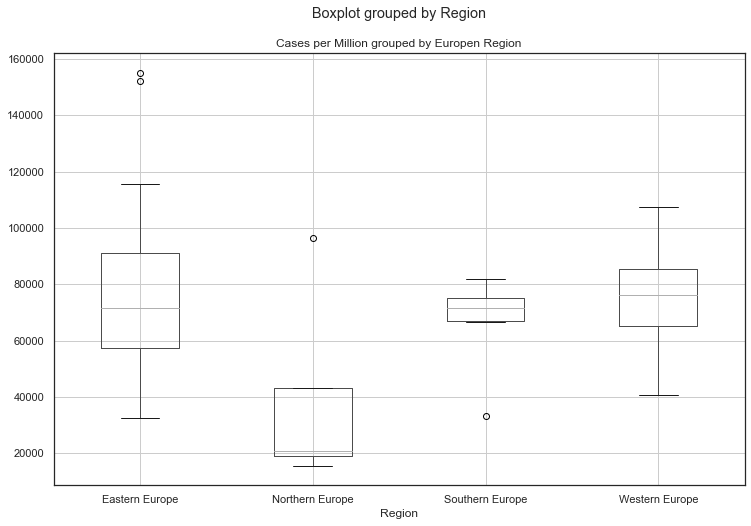

In [97]:
#https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/#:~:text=%20ANOVA%20in%20Python%20using%20Statsmodels%20%201,carry%20out%20the%20ANOVA%20in%20Python%0ASave%20More%20

#Create a boxplot
CovidEuro.boxplot('Cases/M', by='Region', figsize=(12, 8))

# ctrl = CovidEuro['Cases/M'][CovidEuro.Region == 'ctrl']
grps = pd.unique(CovidEuro.Region.values)
d_data = {grp:CovidEuro['Cases/M'][CovidEuro.Region == grp] for grp in grps}

k = len(pd.unique(CovidEuro.Region))  # number of conditions
N = len(CovidEuro.values)  # conditions times participants
n = CovidEuro.groupby('Region').size()[0] #Participants in each condition
plt.title ("Cases per Million grouped by Europen Region")
